# Карасов Николай Дмитриевич

# Домашняя работа №4

## Задача

Построим двумя способами доверительные интервалы для дисперсии нормального распределения, когда математическое ожидание известно (будем считать, что оно равно нулю).

- С помощью статистики $\sum X_k^2/n$ получаем интервал

$$\Big(\sum X_k^2/\lambda_{(1+\gamma)/2}, \sum X_k^2/\lambda_{(1-\gamma)/2}\Big),$$

где $\lambda_p$ $-$ квантиль порядка $p$ распределения хи-квадрат с $n$ степенями свободы.

- С помощью статистики $(\sum X_k/n)^2$ получаем интервал

$$\Big(n\overline{X}^2/z_{(3+\gamma)/4}^2, n\overline{X}^2/z_{(3-\gamma)/4}^2\Big),$$

где $z_p$ $-$ квантиль порядка $p$ стандартного нормального распределения.

Численно исследуйте поведение этих доверительных интервалов при увеличении объема выборки.

## Импорты библиотек

In [128]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [129]:
def get_width(n, std, gamma):
    
    sample = np.random.normal(loc=0, scale=std, size=n)
    size_sample = np.array(range(1, n + 1))
    
    partial_sum_1 = np.cumsum(sample ** 2)
    partial_sum_2 = np.cumsum(sample) ** 2 / size_sample
    
    left_bound1 = partial_sum_1 / scipy.stats.chi2.ppf((1 + gamma) / 2, size_sample)
    right_bound1 = partial_sum_1 / scipy.stats.chi2.ppf((1 - gamma) / 2, size_sample)
    
    left_bound2 = partial_sum_2 / (scipy.stats.norm.ppf((3 + gamma) / 4, loc=0, scale=1) ** 2)
    right_bound2 = partial_sum_2 / (scipy.stats.norm.ppf((3 - gamma) / 4, loc=0, scale=1) ** 2)
    
    interval_1 = right_bound1 - left_bound1
    interval_2 = right_bound2 - left_bound2
    
    return interval_1, interval_2

In [130]:
def modeling(n, n_exp, std, gamma):
    result_1 = np.zeros(shape=(n, ))
    result_2 = np.zeros(shape=(n, ))
    
    for _ in range(n_exp):
        interval_1, interval_2 = get_width(n, std, gamma)
        result_1 += interval_1
        result_2 += interval_2
    
    return result_1 / n_exp, result_2 / n_exp

In [131]:
def _plot(x, y, std, gamma, task):
    plt.figure(figsize = (14, 6))
    plt.plot(x, y, label = task)
    title = 'Ширина доверительного интервала в зависимости от размера выборки N, std={0}, gamma={1}'.format(std,
                                                                                                           gamma)
    plt.title(title)
    plt.xlabel('N')
    plt.ylabel('Ширина доверительного интервала')
    plt.legend()
    plt.show()

## Моделирование

Строить графики будем для $n \geq 10$.

Зафиксируем число экспериментов `n_exp` и максимальный размер выборки `max_size`.

In [132]:
np.random.seed(555)

In [133]:
n_exp, max_size = 1000, 1000

In [134]:
N_lst = np.arange(10, max_size + 1)

## Случай 1. `std` = 1, `gamma`  = 0.95

In [135]:
std, gamma = 1, 0.95

res1, res2 = modeling(max_size, n_exp, std, gamma)

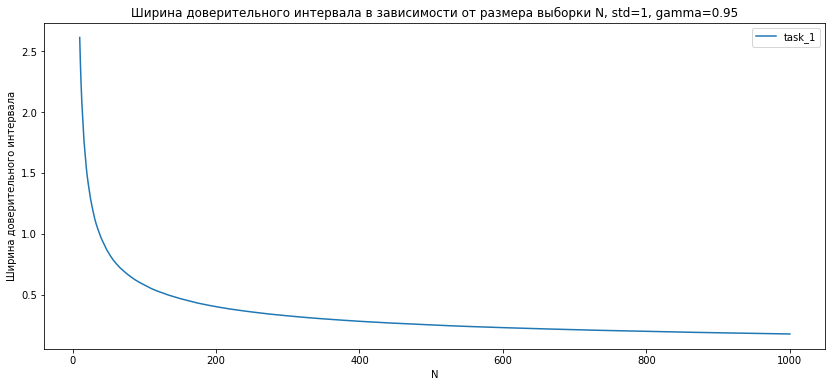

In [136]:
_plot(N_lst, res1[9:], std, gamma, 'task_1')

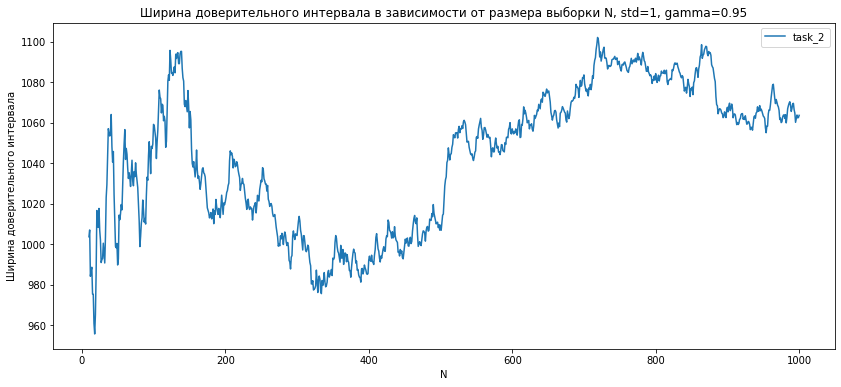

In [137]:
_plot(N_lst, res2[9:], std, gamma, 'task_2')

## Случай 2. `std` = 1, `gamma`  = 0.99

In [138]:
std, gamma = 1, 0.99

res1, res2 = modeling(max_size, n_exp, std, gamma)

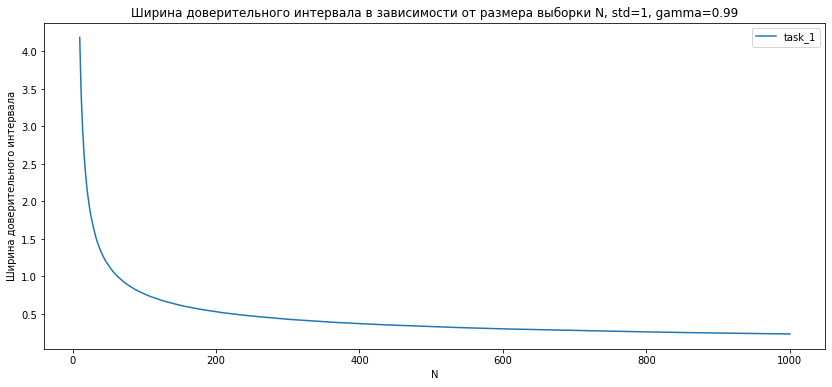

In [139]:
_plot(N_lst, res1[9:], std, gamma, 'task_1')

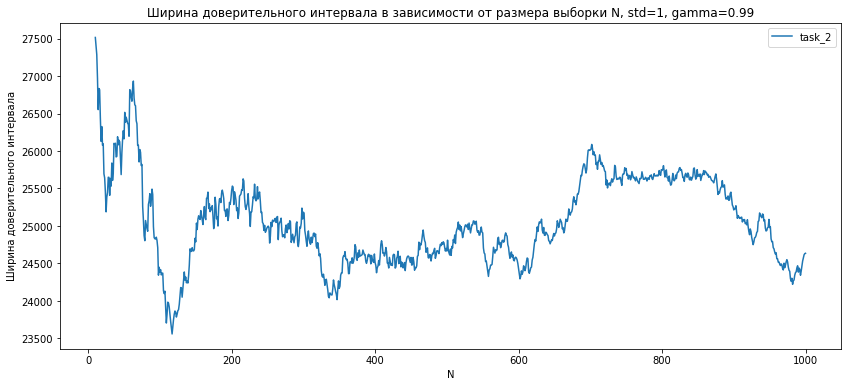

In [140]:
_plot(N_lst, res2[9:], std, gamma, 'task_2')

## Случай 3. `std` = 0.5, `gamma`  = 0.95

In [141]:
std, gamma = 0.5, 0.95

res1, res2 = modeling(max_size, n_exp, std, gamma)

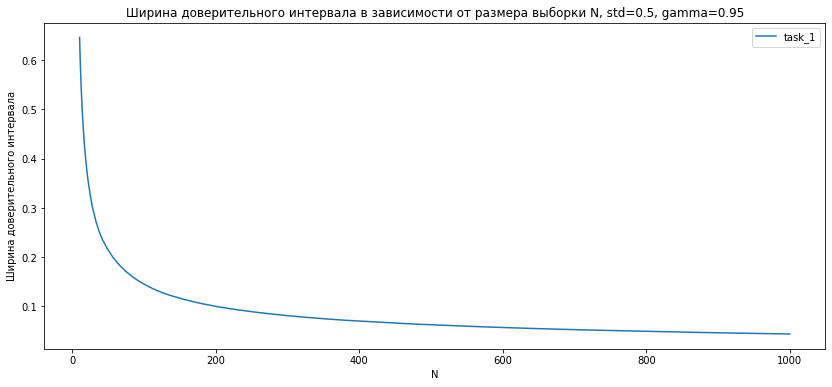

In [142]:
_plot(N_lst, res1[9:], std, gamma, 'task_1')

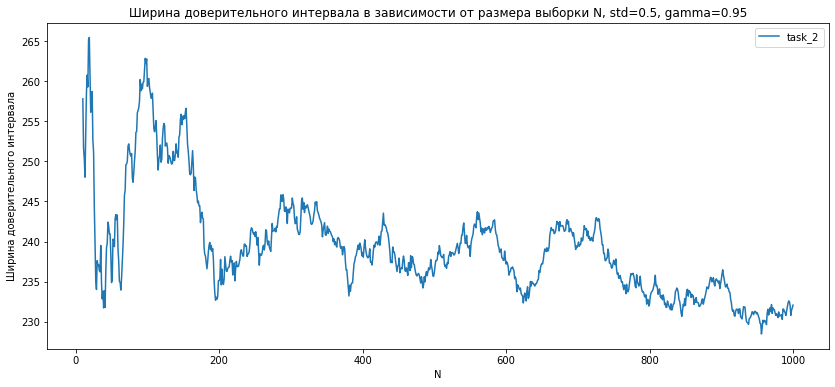

In [143]:
_plot(N_lst, res2[9:], std, gamma, 'task_2')

## Случай 4. `std` = 0.5, `gamma`  = 0.99

In [144]:
std, gamma = 0.5, 0.99

res1, res2 = modeling(max_size, n_exp, std, gamma)

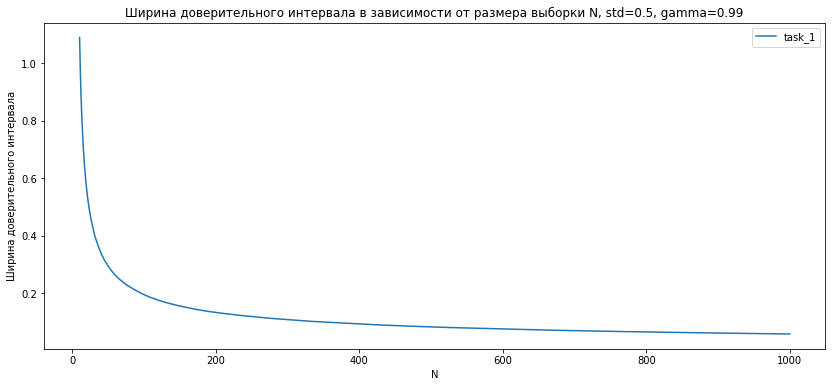

In [145]:
_plot(N_lst, res1[9:], std, gamma, 'task_1')

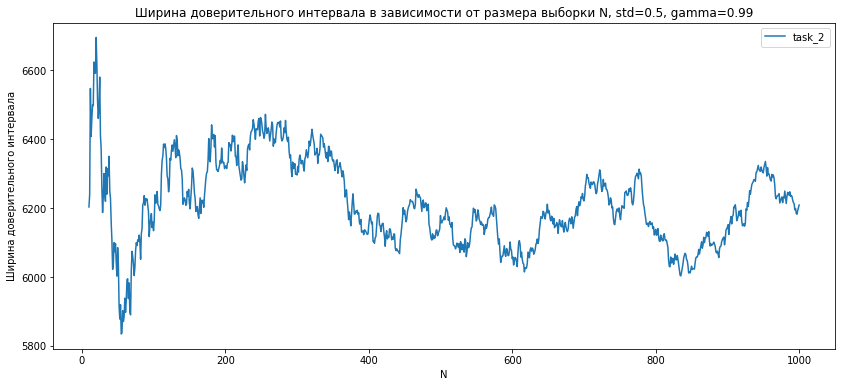

In [146]:
_plot(N_lst, res2[9:], std, gamma, 'task_2')

## Итоги

Во всех экспериментах первый вариант построения доверительного интервала повел себя очень хорошо. С увеличением размеры выборки его ширина стремится к нулю.

А вот второй доверительный интервал ведет себя значительно хуже. С увеличением размера выборки его ширина не стремится к нулю, причем имеет очень большое значение. 

Можно сделать вывод, что первый вариант $-$ адекватный, а второй лучше вообще не использовать в практических задачах.